Task1_0730. 교차 검증을 위한 사용자 함수를 생성한 후 아래 회귀트리 모델들에 대한 교차검증을 수행하세요.
- dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
- rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
- gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
- xgb_reg = XGBRegressor(n_estimators=1000)
- lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target
print(boston_df.info())
boston_df.head()

for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        # 카테고리형 데이터를 숫자로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None


In [18]:
for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)

X_data = boston_df.drop("PRICE", axis=1)
y_target = boston_df["PRICE"]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# 교차 검증 함수 정의
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

# 모델들 정의
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

# 모델 리스트
models = [("DecisionTree", dt_reg),
          ("RandomForest", rf_reg),
          ("GradientBoosting", gb_reg),
          ("XGBoost", xgb_reg),
          ("LightGBM", lgb_reg)]

# 각 모델에 대한 교차 검증 수행 및 결과 출력
for model_name, model in models:
    rmse_scores = perform_cross_validation(model, X_scaled, y_target, cv=5)
    print(f"{model_name} 모델의 5-fold 교차 검증 평균 RMSE: {np.mean(rmse_scores):.3f}")
    print(f"{model_name} 모델의 5-fold 교차 검증 RMSE 점수: {rmse_scores}\n")

# PCA로 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 성분을 사용하여 각 모델에 대한 교차 검증 수행 및 결과 출력
for model_name, model in models:
    rmse_scores = perform_cross_validation(model, X_pca, y_target, cv=5)
    print(f"{model_name} 모델의 PCA 적용 5-fold 교차 검증 평균 RMSE: {np.mean(rmse_scores):.3f}")
    print(f"{model_name} 모델의 PCA 적용 5-fold 교차 검증 RMSE 점수: {rmse_scores}\n")

DecisionTree 모델의 5-fold 교차 검증 평균 RMSE: 5.883
DecisionTree 모델의 5-fold 교차 검증 RMSE 점수: [3.45573245 6.02107483 5.44372006 6.87211666 7.62357203]

RandomForest 모델의 5-fold 교차 검증 평균 RMSE: 4.403
RandomForest 모델의 5-fold 교차 검증 RMSE 점수: [2.79968629 3.63611557 4.44557411 6.79656748 4.33556693]

GradientBoosting 모델의 5-fold 교차 검증 평균 RMSE: 4.281
GradientBoosting 모델의 5-fold 교차 검증 RMSE 점수: [2.75395692 3.88939546 4.42592785 6.302468   4.0347529 ]

XGBoost 모델의 5-fold 교차 검증 평균 RMSE: 4.980
XGBoost 모델의 5-fold 교차 검증 RMSE 점수: [2.92855908 5.53519374 4.82061613 6.92388331 4.69337624]

LightGBM 모델의 5-fold 교차 검증 평균 RMSE: 4.563
LightGBM 모델의 5-fold 교차 검증 RMSE 점수: [2.8842723  4.42746962 4.24910591 6.55757356 4.69660008]

DecisionTree 모델의 PCA 적용 5-fold 교차 검증 평균 RMSE: 7.553
DecisionTree 모델의 PCA 적용 5-fold 교차 검증 RMSE 점수: [4.9319218  9.32151529 9.9338293  8.09225693 5.48377886]

RandomForest 모델의 PCA 적용 5-fold 교차 검증 평균 RMSE: 7.306
RandomForest 모델의 PCA 적용 5-fold 교차 검증 RMSE 점수: [5.20291809 9.35048931 8.19446682 8.27511796 5

In [6]:
### 강사님
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.883 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.403 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.278 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.980 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.531 


<Axes: xlabel='None', ylabel='None'>

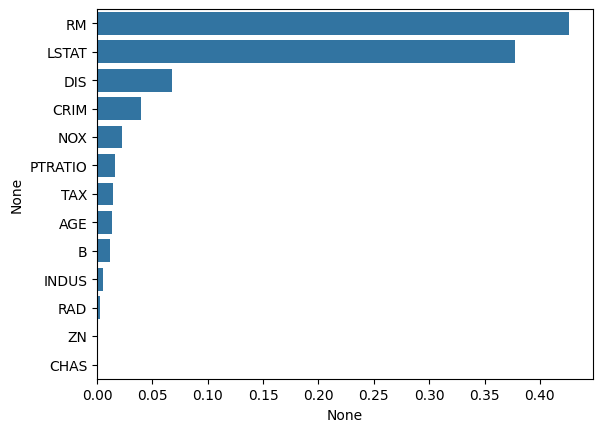

In [7]:
### 강사님
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

<Axes: xlabel='None', ylabel='None'>

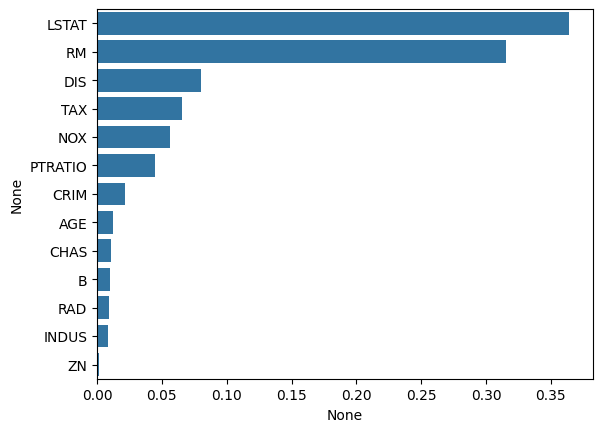

In [8]:
## 강사님
import seaborn as sns

xgb = XGBRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
xgb.fit(X_data, y_target)

feature_series = pd.Series(data=xgb.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [9]:
boston_df.sample(n=3, random_state=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6


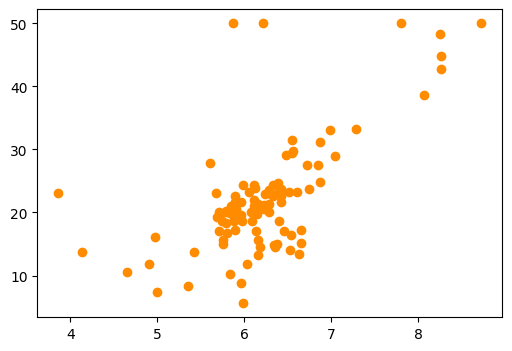

In [14]:
import matplotlib.pyplot as plt

bostonDF_sample=boston_df[["RM", "PRICE"]]
bostonDF_sample=bostonDF_sample.sample(n=100, random_state=0)
plt.figure(figsize=(6,4))
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

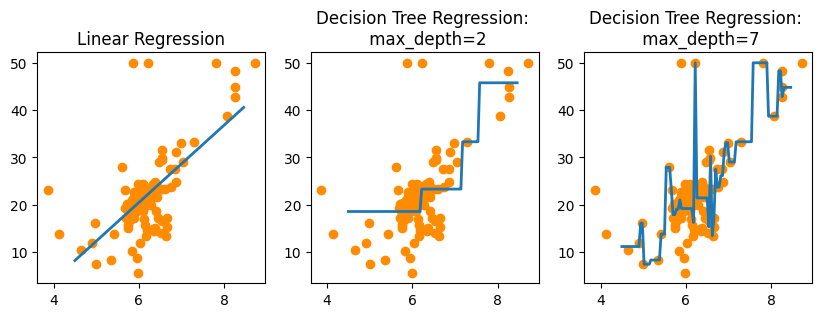

In [16]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(10,3), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_dt2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_dt7, label="max_depth:7", linewidth=2)

선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다. max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.

Task2_0730. iris 데이터셋에 대하여 랜덤포레스트로 학습 및 평가한 결과와 차원축소한 후 c1,c2를 적용하여 학습 평가한 결과를 비교하셍요. (단 cross_val_score를 적용하여 평가)

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 랜덤 포레스트 분류기 학습 및 평가 (원본 데이터)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
original_scores = cross_val_score(rf, X_scaled, y, cv=5)
print("Original data RF accuracy:", original_scores)
print("Original data RF mean-accuracy:", np.mean(original_scores))

# PCA로 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 성분 1, 2를 사용하여 랜덤 포레스트 분류기 학습 및 평가
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
pca_scores = cross_val_score(rf_pca, X_pca, y, cv=5)
print("PCA transformed data RF accuracy:", pca_scores)
print("PCA transformed data RF mean-accuracy:", np.mean(pca_scores))

Original data RF accuracy: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Original data RF mean-accuracy: 0.9666666666666668
PCA transformed data RF accuracy: [0.86666667 0.93333333 0.83333333 0.9        1.        ]
PCA transformed data RF mean-accuracy: 0.9066666666666666


In [27]:
## 강사님
# 분류를 적용한 결과 비교
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores)
print('평균 정확도 : {:.2f}'.format(np.mean(scores)))



### PCA
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(iris.data, columns=columns)
df_iris['target'] = iris.target

df_iris.head()
df_iris1=df_iris.drop('target',axis=1)
df_iris1.head()

from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(df_iris1)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
# pca.fit(iris_scaled)
# iris_pca=pca.transform(iris_scaled)
iris_pca=pca.fit_transform(iris_scaled)
print(iris_pca.shape)

pca_columns = ['pca_component_1', 'pca_component_2']
df_iris_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_iris_pca['target'] = iris.target
df_iris_pca.head()


# PCA 변환 데이터 세트 적용
pca_X = df_iris_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores_pca)
print('평균 정확도 : {:.2f}'.format(np.mean(scores_pca)))

cv=3인 경우의 개별 폴드 세트별 정확도: [0.98 0.94 0.96]
평균 정확도 : 0.96
(150, 2)
cv=3인 경우의 개별 폴드 세트별 정확도: [0.88 0.88 0.88]
평균 정확도 : 0.88


### PCA 데이터 세트에 기반한 신용카드 고객 연체 여부 분류 예측
* 신용카드 데이터 세트는 30000개의 레코드와 24개의 속성을 가지고 있으며 'default payment next month' 속성이
  Target 값으로 연체일 경우 1, 정상납부가 0임.

In [21]:
import openpyxl
filepath='/content/drive/MyDrive/KITA_2024/M5_MachineLearning/dataset/credit_card.xls'
df=pd.read_excel(filepath, header=1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
# PAY_0 칼럼을 PAY_1으로 'default payment next month' 칼럼도 'default'로 칼럼명 변경. ID 삭제.
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop(['default','ID'], axis=1)


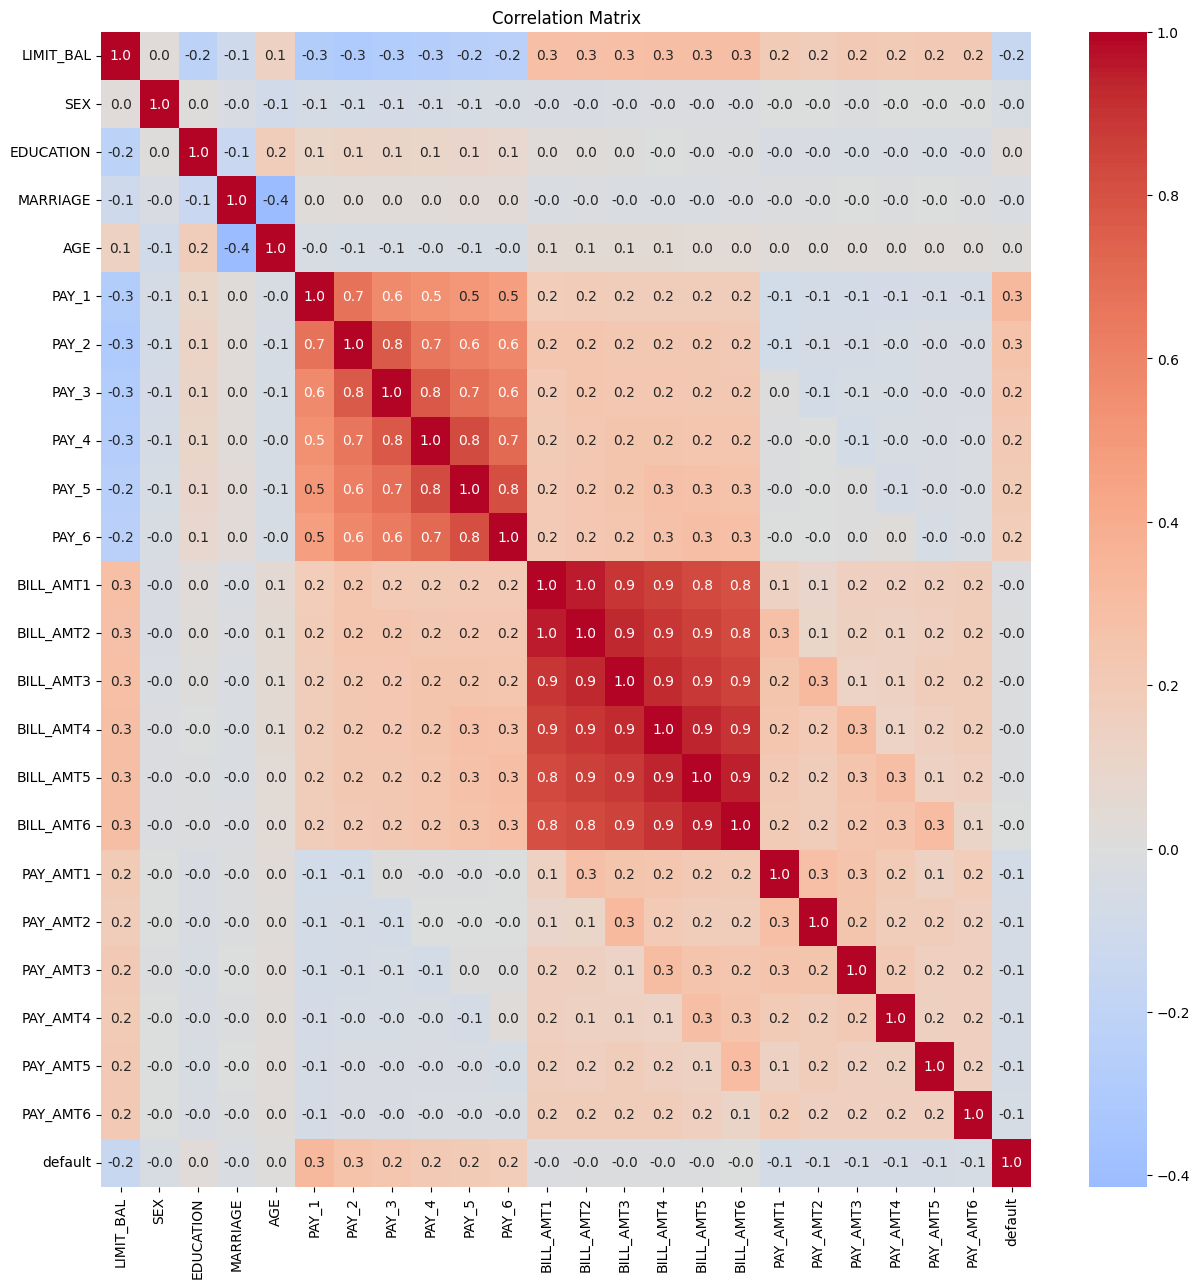

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15));
sns.heatmap(df.drop(columns=['ID']).corr(), annot=True, cmap='coolwarm', center=0, fmt='.1f')
plt.title('Correlation Matrix'); plt.show()

Task3_0730. 상관도가 높은 BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성에 대하여 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산하세요.

In [ ]:
# selected_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
# df_selected = df[selected_columns]
df_selected = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
df_selected.head()

from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df_selected)

from sklearn.decomposition import PCA
pca=PCA(n_components=2)

df_pca=pca.fit_transform(df_scaled)
print(df_pca.shape)
print(type(df_pca))

pca_columns = ['pca_component_1', 'pca_component_2']
df_CD_pca = pd.DataFrame(df_pca, columns=pca_columns)
df_CD_pca['target'] = df['default']
df_CD_pca.head()

(30000, 2)
<class 'numpy.ndarray'>


,pca_component_1,pca_component_2,target
0,-1.611148,0.012479,1
1,-1.547595,-0.062344,1
2,-1.035874,0.011256,0
3,-0.250712,0.174374,0
4,-0.968951,-0.213032,0


In [ ]:
df_scaled

array([[-0.64250107, -0.64739923, -0.66799331, -0.67249727, -0.66305853,
        -0.65272422],
       [-0.65921875, -0.66674657, -0.63925429, -0.62163594, -0.60622927,
        -0.59796638],
       [-0.29855966, -0.49389911, -0.48240819, -0.44973025, -0.41718767,
        -0.39162956],
       ...,
       [-0.64722711, -0.64383044, -0.63815838, -0.34796096, -0.32451732,
        -0.32768664],
       [-0.71798186,  0.41026929,  0.42237335,  0.14784373, -0.46806261,
         0.16913036],
       [-0.04473888, -0.00385085,  0.03966713, -0.10458204, -0.12966943,
        -0.39559241]])

In [ ]:
df_pca

array([[-1.61114812,  0.01247912],
       [-1.54759523, -0.06234401],
       [-1.03587378,  0.01125622],
       ...,
       [-1.19551872, -0.3595072 ],
       [-0.00829343, -0.04995798],
       [-0.25828552,  0.26525237]])

In [ ]:
df_CD_pca

,pca_component_1,pca_component_2,target
0,-1.611148,0.012479,1
1,-1.547595,-0.062344,1
2,-1.035874,0.011256,0
3,-0.250712,0.174374,0
4,-0.968951,-0.213032,0
...,...,...,...
29995,2.610194,2.419078,0
29996,-1.521009,-0.066271,0
29997,-1.195519,-0.359507,1
29998,-0.008293,-0.049958,1


In [ ]:
print(df_CD_pca.pca_component_1.max(), df_CD_pca.pca_component_1.min())
print(df_CD_pca.pca_component_2.max(), df_CD_pca.pca_component_2.min())
print(df_CD_pca.pca_component_1.mean(), df_CD_pca.pca_component_1.std())
print(df_CD_pca.pca_component_2.mean(), df_CD_pca.pca_component_2.std())

30.927850903251258 -3.9197637739817446
7.494111951950259 -7.1725403217886115
-2.4632148173016805e-17 2.330986115131193
-1.8474111129762604e-17 0.5531097583976047


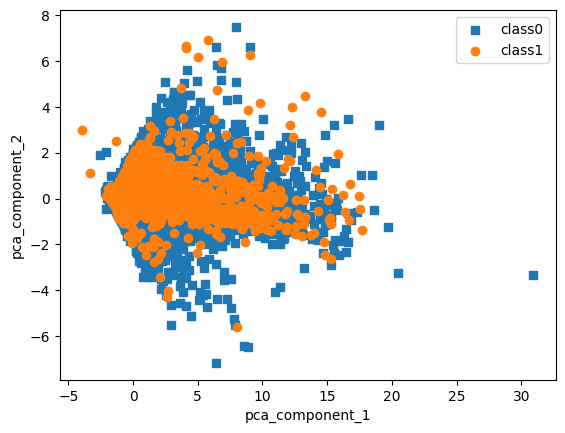

In [ ]:
markers=['s','o']

for i, marker in enumerate(markers):
  x_axis_data = df_CD_pca[df_CD_pca['target'] == i]['pca_component_1']
  y_axis_data = df_CD_pca[df_CD_pca['target'] == i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label='class'+str(i))
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.90555253, 0.0509867 ])

In [24]:
## 강사님
# 상관도가 높은 속성을 PCA로 변환한 뒤 explained_variance_ratio_ 속성으로 확인
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 6개의 속성을 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
# 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명
print('PCA Component 별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component 별 변동성: [0.90555253 0.0509867 ]


Task4_0730. 신용카드 데이터셋 전체 23개 속성에 대하여 6개의 컴포넌트를 가진 PCA 변환을 수행하고 모델은 RF, cv=3, scoring='accuracy'을 적용하여 cross_val_score()로 분류 예측 수행하세요.

In [29]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


import openpyxl
filepath='/content/drive/MyDrive/KITA_2024/M5_MachineLearning/dataset/credit_card.xls'
df=pd.read_excel(filepath, header=1)
print(df.info())
df.head()

# PAY_0 칼럼을 PAY_1으로 'default payment next month' 칼럼도 'default'로 칼럼명 변경. ID 삭제.
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)

y = df['default']
X = df.drop(['default','ID'], axis=1)

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 랜덤 포레스트 분류기 학습 및 평가 (원본 데이터)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
original_scores = cross_val_score(rf, X_scaled, y, cv=3, scoring='accuracy')
print("Original data RF accuracy:", np.mean(original_scores))

# PCA로 6차원으로 축소
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# PCA 성분 사용하여 랜덤 포레스트 분류기 학습 및 평가
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
pca_scores = cross_val_score(rf_pca, X_pca, y, cv=3, scoring='accuracy')
print("PCA transformed data RF accuracy:", np.mean(pca_scores))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# 축소된 차원 수 및 설명된 분산 비율 출력
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])
print("Explained variance ratio of each principal component:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", np.cumsum(pca.explained_variance_ratio_))

Original number of features: 23
Reduced number of features: 6
Explained variance ratio of each principal component: [0.28448215 0.17818817 0.06743306 0.06401154 0.04457551 0.04161689]
Cumulative explained variance ratio: [0.28448215 0.46267032 0.53010338 0.59411491 0.63869042 0.68030731]


In [31]:
## 강사님
# 원본 데이터 세트와 PCA 변환한 데이터 세트의 분류 예측 결과 비교

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


import openpyxl
filepath='/content/drive/MyDrive/KITA_2024/M5_MachineLearning/dataset/credit_card.xls'
df=pd.read_excel(filepath, header=1)
print(df.info())
df.head()

# PAY_0 칼럼을 PAY_1으로 'default payment next month' 칼럼도 'default'로 칼럼명 변경. ID 삭제.
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop(['default','ID'], axis=1)


rcf = RandomForestClassifier(n_estimators=300, random_state=150)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

# 원본 데이터 세트의 분류 예측 결과

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [32]:
# 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측결과 보다
# 1~2% 정도의 예측 성능 저하만 발생
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)
rcf = RandomForestClassifier(n_estimators=300, random_state=150)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

# 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대한 동일한 분류 예측

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7918 0.7964 0.8017]
PCA 변환 데이터 세트 평균 정확도:0.7966
